# Data Acquisition and Exploration

## Objectives
By the end of this notebook, we will able to:
- Load and understand e-commerce datasets with different structures
- Perform initial data assessment and cleaning
- Apply exploratory data analysis techniques to uncover patterns in customer behavior
- Visualize the customer journey across different interactions with an e-commerce platforfm
- Extract preliminary business insights from raw data

## 1. Data Loading and Initial assessment

### 1.1 Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

print("libraries imported")

libraries imported


### 1.2 Load the Datasets

#### 1.2.1 E-commerce User Behavior Dataset

In [2]:
def load_ecommerce_behavior(file_path, sample_size=None, random_state=42):
    """
    Load the e-commerce behavior dataset with optional sampling
    
    Parameters:
    -----------
    file_path : str
        Path to the CSV file
    sample_size : int, optional
        Number of rows to sample (None for all data)
    random_state : int
        Random seed for reproducibility
        
    Returns:
    --------
    pandas.DataFrame
        Loaded and sampled dataframe
    """
    df = pd.read_csv(file_path)
    
    if sample_size is not None and sample_size < len(df):
        df = df.sample(sample_size, random_state=random_state)
    
    df['event_time'] = pd.to_datetime(df['event_time'])
    
    return df

ecom_df = load_ecommerce_behavior('../data/raw/2019-Oct.csv', sample_size=1000)

# Display basic information
print(f"E-commerce Behavior Dataset Shape: {ecom_df.shape}")
ecom_df.head()

E-commerce Behavior Dataset Shape: (1000, 9)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
10257365,2019-10-09 02:46:19+00:00,view,29900078,2059484601444729123,NaN,peda,1647.40,532353313,47059489-3a63-4353-9eab-0e239d5cb5aa
28875143,2019-10-21 16:17:11+00:00,view,1801805,2053013554415534427,electronics.video.tv,artel,231.60,536042235,a65ee34b-7701-4b25-95e7-45a1259e747e
28709595,2019-10-21 14:42:20+00:00,cart,1004870,2053013555631882655,electronics.smartphone,samsung,284.02,517143806,a9ba13a7-afac-41ca-a3bc-016c580908c3
3458568,2019-10-03 18:40:22+00:00,view,5701087,2053013553970938175,auto.accessories.player,jvc,51.48,556492770,799d5c0a-e1f3-4f22-b61d-ab78cfed068c
25352815,2019-10-19 08:58:51+00:00,view,5300097,2053013563173241677,NaN,remington,39.87,561838859,dd474f7f-0559-41f5-8be0-9d0912cf2b1b


#### 1.2.2 Online Retail II Dataset

In [8]:
def load_online_retail(file_path):
    """
    Load the Online Retail II dataset
    
    Parameters:
    -----------
    file_path : str
        Path to the Excel file
        
    Returns:
    --------
    pandas.DataFrame
        Loaded dataframe
    """
    df = pd.read_csv(file_path)
    
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

    # Filter out rows with missing Customer IDs
    df = df.dropna(subset=['Customer ID'])
    
    df['Customer ID'] = df['Customer ID'].astype(int)
    
    return df

retail_df = load_online_retail('../data/raw/online_retail_II.csv')

# Display basic information
print(f"Online Retail Dataset Shape: {retail_df.shape}")
retail_df.head()

Online Retail Dataset Shape: (824364, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


#### 1.2.3 Customer Personality Analysis Dataset

In [11]:
def load_customer_personality(file_path):
    """
    Load the Customer Personality Analysis dataset
    
    Parameters:
    -----------
    file_path : str
        Path to the CSV file
        
    Returns:
    --------
    pandas.DataFrame
        Loaded dataframe
    """
    df = pd.read_csv(file_path, sep='\t')
    
    date_columns = ['Dt_Customer']
    for col in date_columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], format='mixed')
    
    return df

personality_df = load_customer_personality('../data/raw/marketing_campaign.csv')

# Display basic information
print(f"Customer Personality Dataset Shape: {personality_df.shape}")
personality_df.head()


Customer Personality Dataset Shape: (2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


### 1.3 Initial Data Assessment

For each dataset, we'll perform an initial assessment to understand:
- Data completeness (missing values)
- Data types and structure
- Basic statistics
- Potential issues or anomalies


#### 1.3.1 E-commerce Behavior Dataset Assessment


In [12]:
# Basic information
ecom_df.info()

# Summary statistics
ecom_df.describe(include='all').T

# Check for missing values
ecom_df.isnull().sum()

# Check unique values for categorical columns
for col in ['event_type', 'category_code', 'brand']:
    print(f"\nUnique values in {col}: {ecom_df[col].nunique()}")
    print(f"Top 10 most common {col}s:")
    print(ecom_df[col].value_counts().head(10))


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 10257365 to 40741334
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   event_time     1000 non-null   datetime64[ns, UTC]
 1   event_type     1000 non-null   object             
 2   product_id     1000 non-null   int64              
 3   category_id    1000 non-null   int64              
 4   category_code  682 non-null    object             
 5   brand          846 non-null    object             
 6   price          1000 non-null   float64            
 7   user_id        1000 non-null   int64              
 8   user_session   1000 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 78.1+ KB

Unique values in event_type: 3
Top 10 most common event_types:
event_type
view        953
cart         28
purchase     19
Name: count, dtype: int64

Unique values in category_code: 80


#### 1.3.2 Online Retail Dataset Assessment

In [13]:
# Basic information
retail_df.info()

# Summary statistics
retail_df.describe(include='all').T

# Check for missing values
retail_df.isnull().sum()

# Check for potential issues in the data
print(f"Number of transactions with negative quantity: {(retail_df['Quantity'] < 0).sum()}")
print(f"Number of transactions with zero price: {(retail_df['Price'] <= 0).sum()}")

# Check unique values for key columns
print(f"Number of unique products: {retail_df['StockCode'].nunique()}")
print(f"Number of unique customers: {retail_df['Customer ID'].nunique()}")
print(f"Number of countries: {retail_df['Country'].nunique()}")
print(f"Top 10 countries by number of transactions:")
print(retail_df['Country'].value_counts().head(10))


<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  int64         
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 56.6+ MB
Number of transactions with negative quantity: 18744
Number of transactions with zero price: 71
Number of unique products: 4646
Number of unique customers: 5942
Number of countries: 41
Top 10 countries by number of transactions:
Country
United Kingdom    741301
Germany            17624
EIRE               16195


#### 1.3.3 Customer Personality Dataset Assessment

In [15]:
# Basic information
personality_df.info()

# Summary statistics
personality_df.describe(include='all').T

# Check for missing values
personality_df.isnull().sum()

# Demographic information
print(f"Age distribution: {personality_df['Year_Birth'].describe()}")
print(f"\nEducation level distribution:")
print(personality_df['Education'].value_counts())
print(f"\nMarital status distribution:")
print(personality_df['Marital_Status'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

## 2. Exploratory Data Analysis with Meaningful Visualizations

Now we'll explore the datasets to gain insights into customer behavior patterns.

### 2.1 E-commerce Behavior Analysis

#### 2.1.1 Events Distribution


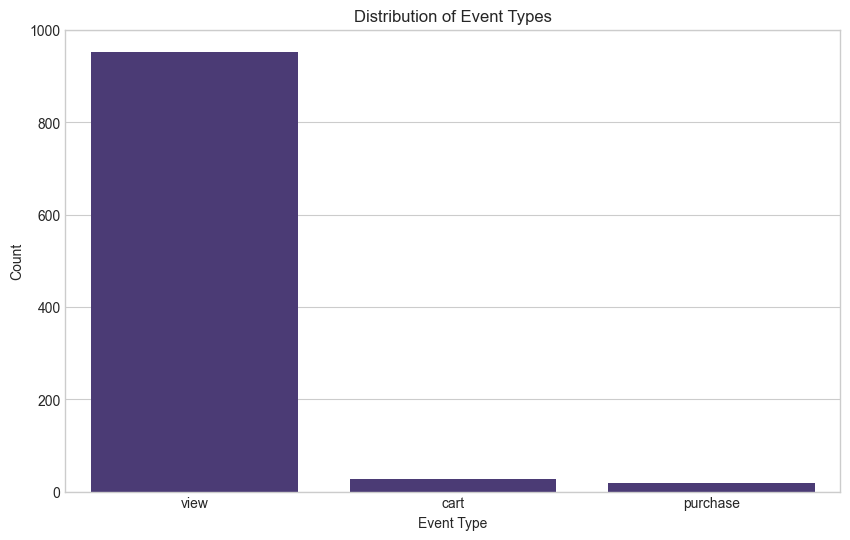

Conversion Rates:
View to Cart: 2.94%
Cart to Purchase: 67.86%
View to Purchase: 1.99%


In [16]:
# Distribution of event types
plt.figure(figsize=(10, 6))
event_counts = ecom_df['event_type'].value_counts()
sns.barplot(x=event_counts.index, y=event_counts.values)
plt.title('Distribution of Event Types')
plt.ylabel('Count')
plt.xlabel('Event Type')
plt.xticks(rotation=0)
plt.show()

# Calculate conversion rates
total_views = event_counts.get('view', 0)
total_cart_adds = event_counts.get('cart', 0)
total_purchases = event_counts.get('purchase', 0)

view_to_cart_rate = (total_cart_adds / total_views * 100) if total_views > 0 else 0
cart_to_purchase_rate = (total_purchases / total_cart_adds * 100) if total_cart_adds > 0 else 0
view_to_purchase_rate = (total_purchases / total_views * 100) if total_views > 0 else 0

print(f"Conversion Rates:")
print(f"View to Cart: {view_to_cart_rate:.2f}%")
print(f"Cart to Purchase: {cart_to_purchase_rate:.2f}%")
print(f"View to Purchase: {view_to_purchase_rate:.2f}%")


#### 2.1.2 Temporal Patterns

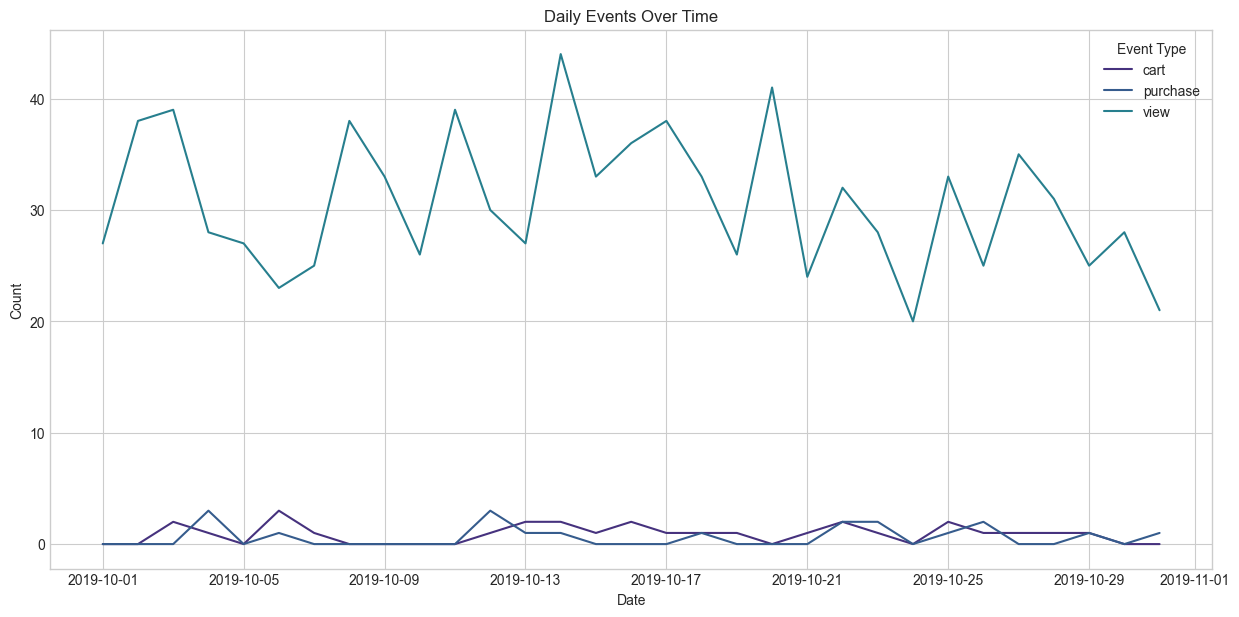

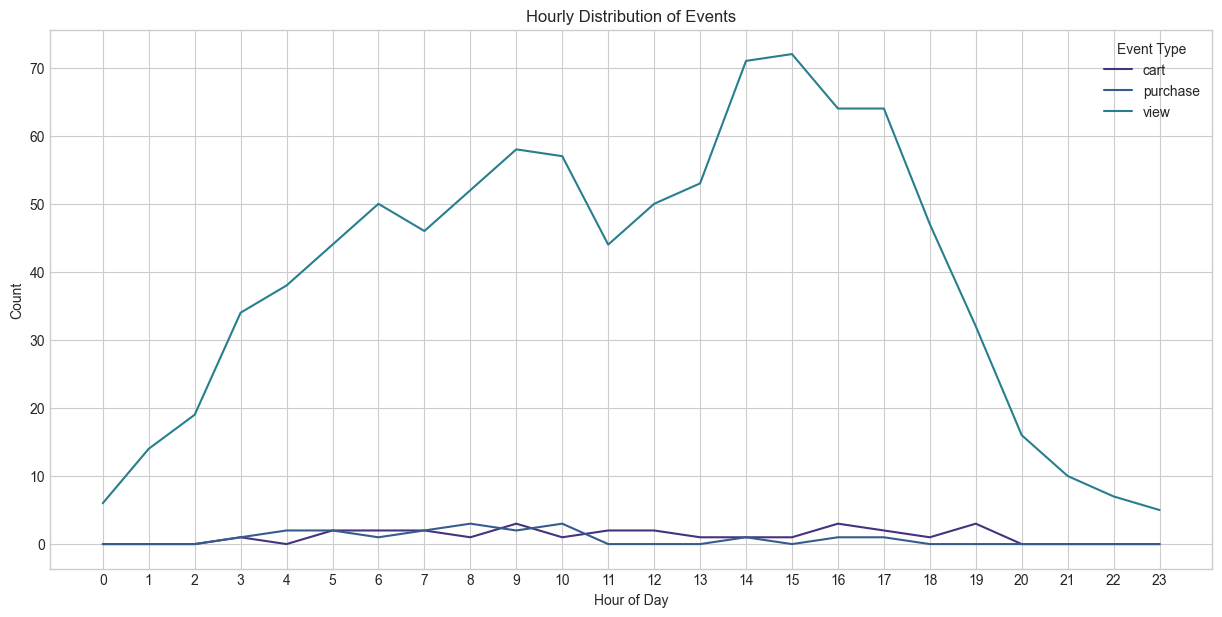

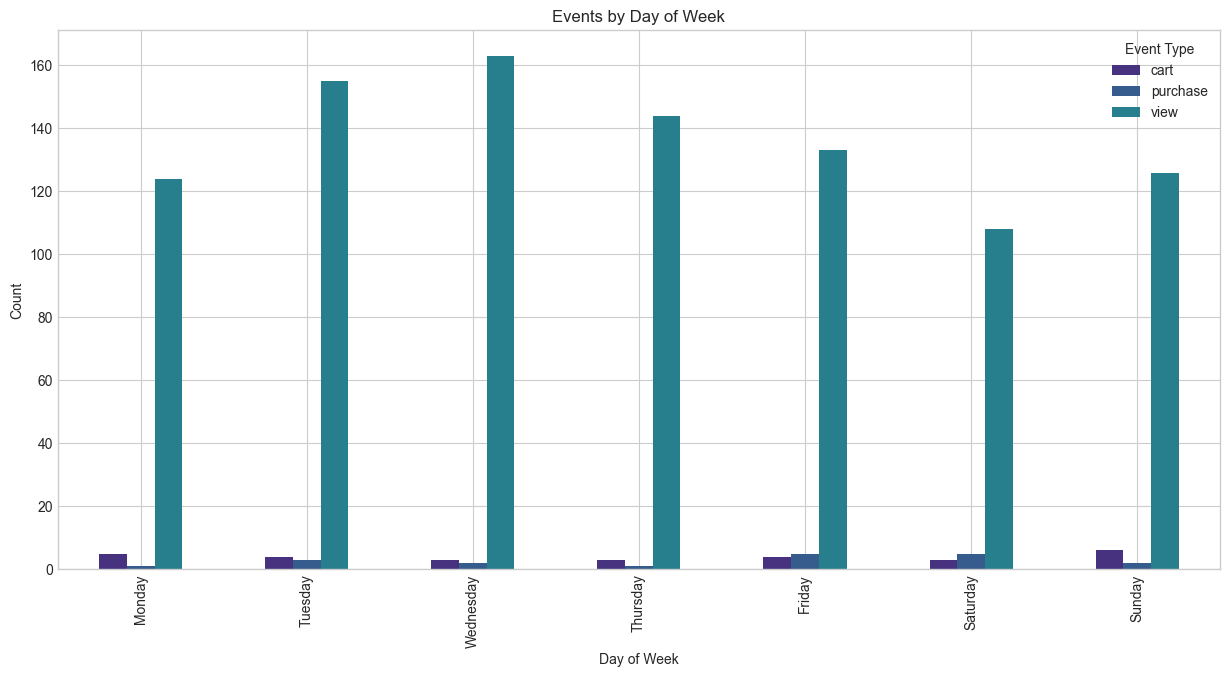

In [17]:
# Add date and time features
ecom_df['date'] = ecom_df['event_time'].dt.date
ecom_df['hour'] = ecom_df['event_time'].dt.hour
ecom_df['day_of_week'] = ecom_df['event_time'].dt.dayofweek
ecom_df['day_name'] = ecom_df['event_time'].dt.day_name()

# Daily event counts
daily_events = ecom_df.groupby(['date', 'event_type']).size().unstack().fillna(0)
plt.figure(figsize=(15, 7))
daily_events.plot(kind='line', ax=plt.gca())
plt.title('Daily Events Over Time')
plt.ylabel('Count')
plt.xlabel('Date')
plt.legend(title='Event Type')
plt.show()

# Hourly patterns
hourly_events = ecom_df.groupby(['hour', 'event_type']).size().unstack().fillna(0)
plt.figure(figsize=(15, 7))
hourly_events.plot(kind='line', ax=plt.gca())
plt.title('Hourly Distribution of Events')
plt.ylabel('Count')
plt.xlabel('Hour of Day')
plt.xticks(range(0, 24))
plt.legend(title='Event Type')
plt.show()

# Day of week patterns
dow_events = ecom_df.groupby(['day_name', 'event_type']).size().unstack().fillna(0)
# Reorder days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_events = dow_events.reindex(day_order)

plt.figure(figsize=(15, 7))
dow_events.plot(kind='bar', ax=plt.gca())
plt.title('Events by Day of Week')
plt.ylabel('Count')
plt.xlabel('Day of Week')
plt.legend(title='Event Type')
plt.show()


#### 2.1.3 Category and Brand Analysis

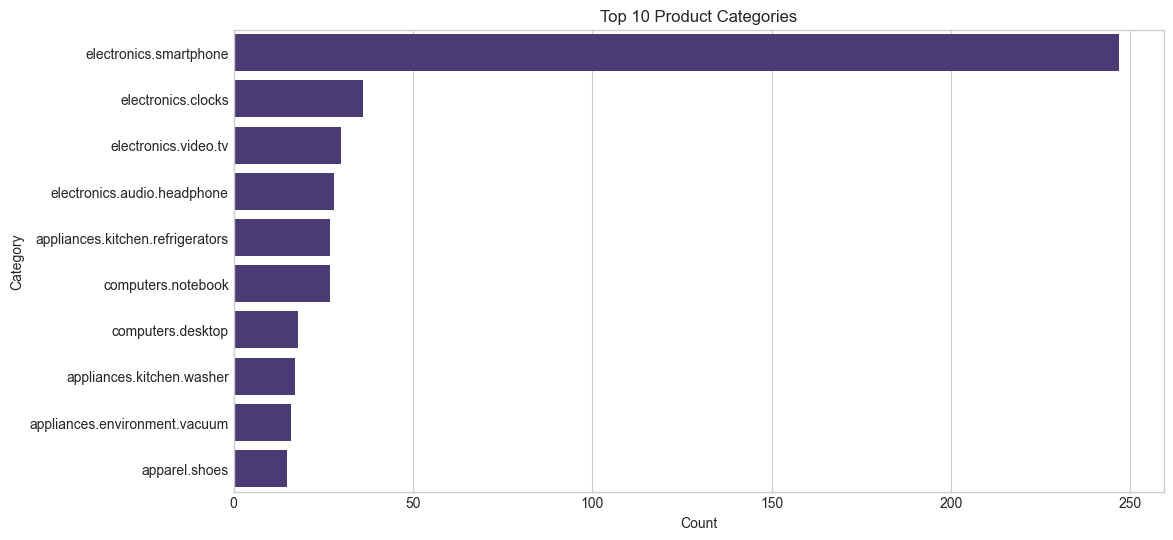

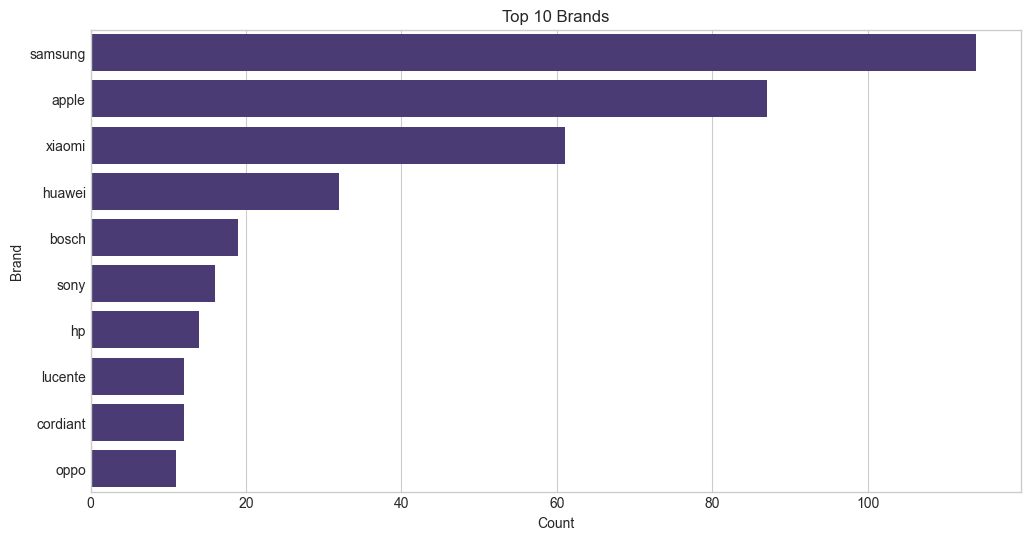

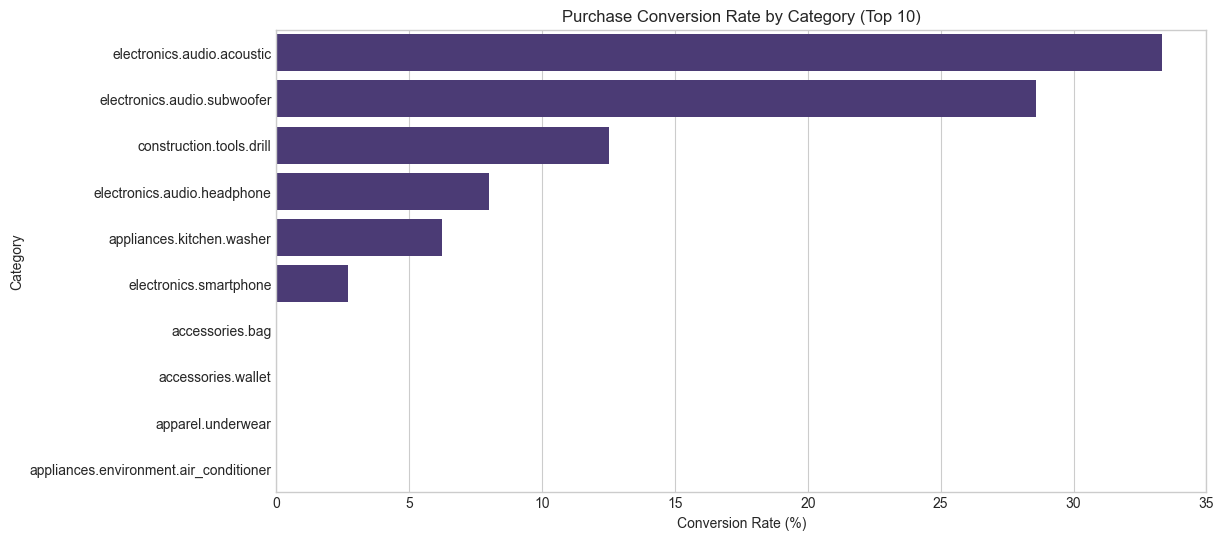

In [18]:
# Top categories by popularity
top_categories = ecom_df['category_code'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 Product Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

# Top brands by popularity
top_brands = ecom_df['brand'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands.values, y=top_brands.index)
plt.title('Top 10 Brands')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

# Purchase conversion rate by category
category_conversion = ecom_df.groupby('category_code')['event_type'].apply(
    lambda x: (x == 'purchase').sum() / (x == 'view').sum() * 100 if (x == 'view').sum() > 0 else 0
).sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_conversion.values, y=category_conversion.index)
plt.title('Purchase Conversion Rate by Category (Top 10)')
plt.xlabel('Conversion Rate (%)')
plt.ylabel('Category')
plt.show()


#### 2.1.4 Price Analysis


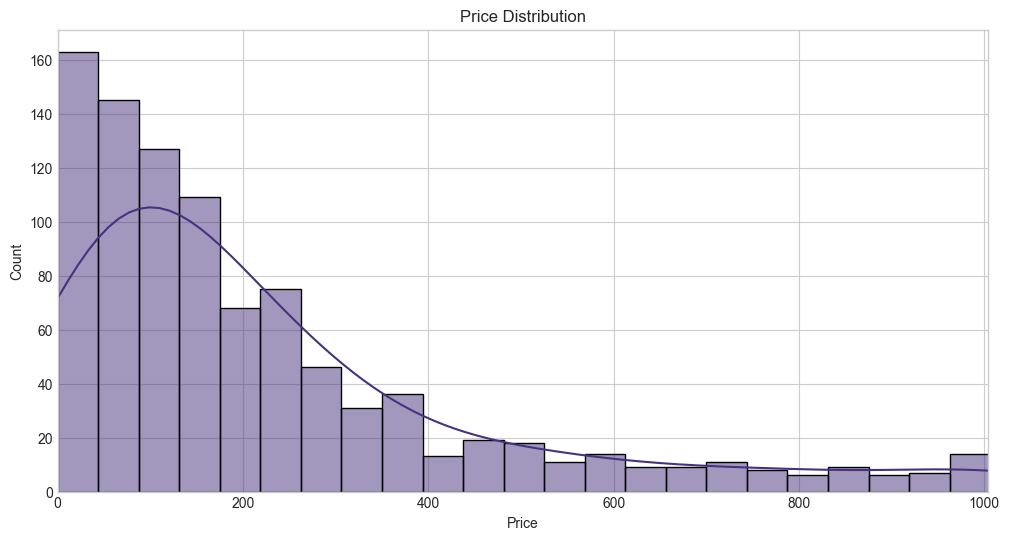

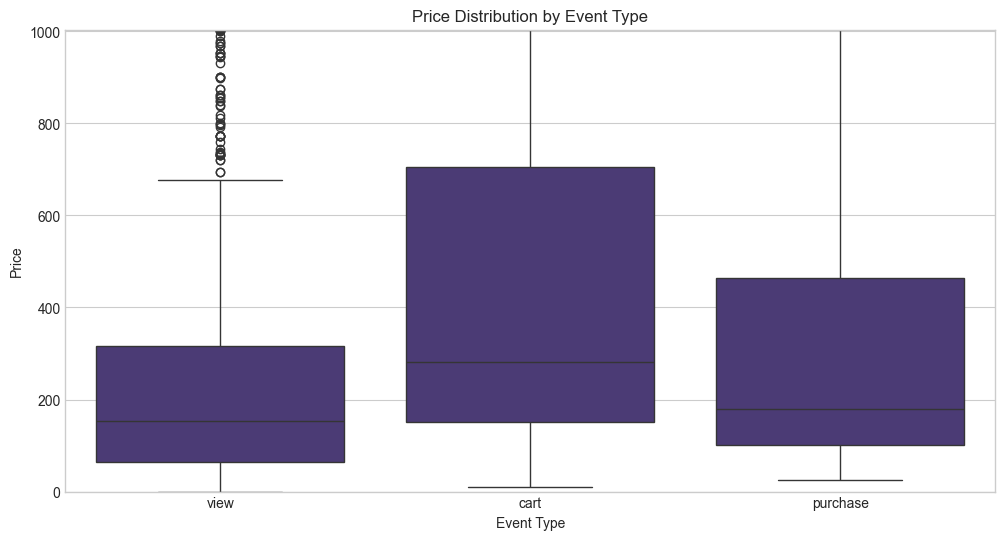

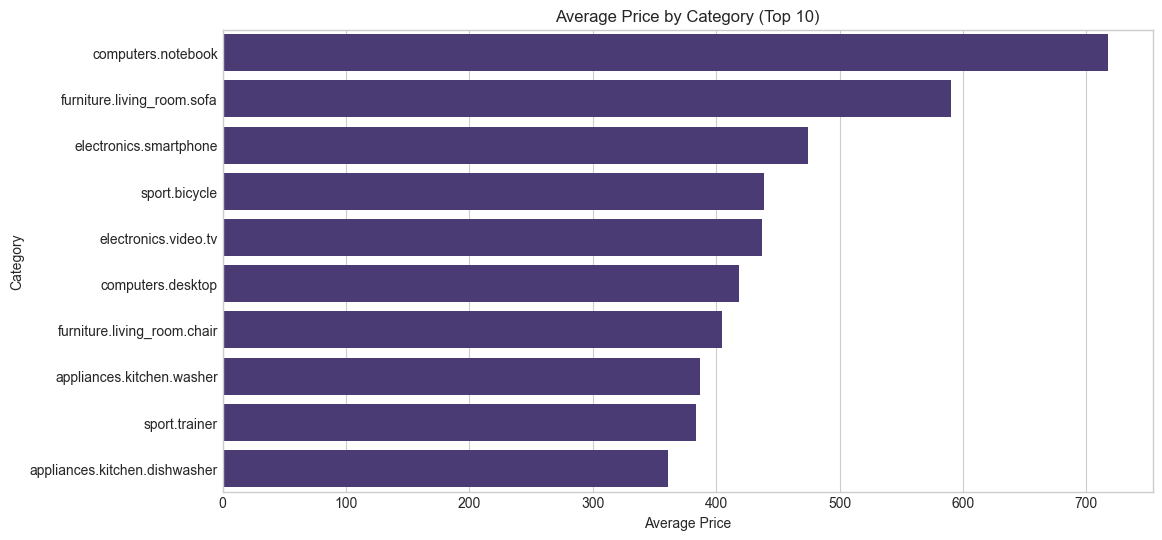

In [19]:
# Price distribution
plt.figure(figsize=(12, 6))
sns.histplot(ecom_df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.xlim(0, ecom_df['price'].quantile(0.95))  # Limit x-axis to 95th percentile to handle outliers
plt.show()

# Price distribution by event type
plt.figure(figsize=(12, 6))
sns.boxplot(x='event_type', y='price', data=ecom_df)
plt.title('Price Distribution by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Price')
plt.ylim(0, ecom_df['price'].quantile(0.95))  # Limit y-axis to 95th percentile
plt.show()

# Average price by category
avg_price_by_category = ecom_df.groupby('category_code')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_category.values, y=avg_price_by_category.index)
plt.title('Average Price by Category (Top 10)')
plt.xlabel('Average Price')
plt.ylabel('Category')
plt.show()


### 2.2. Online Retail Analysis

#### 2.2.1 Transaction Patterns

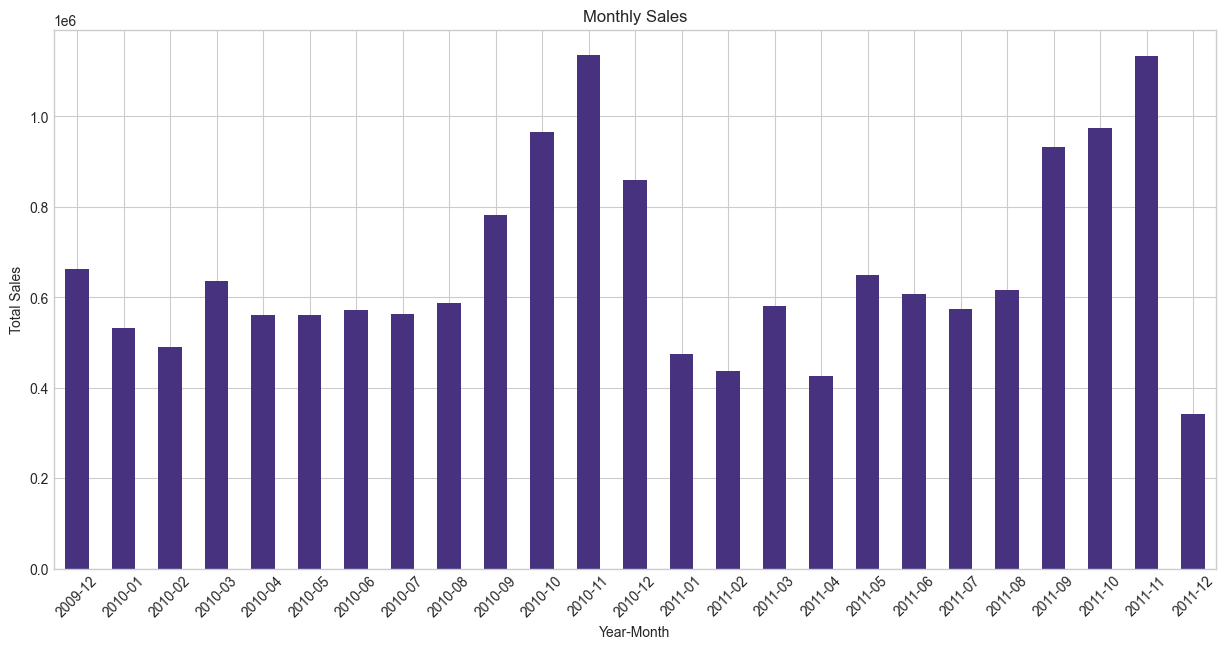

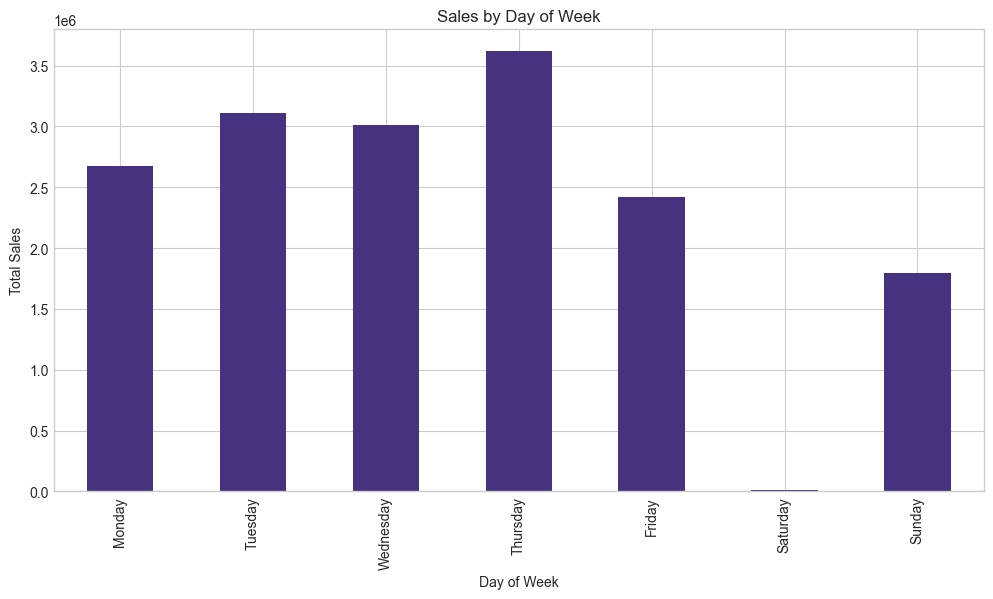

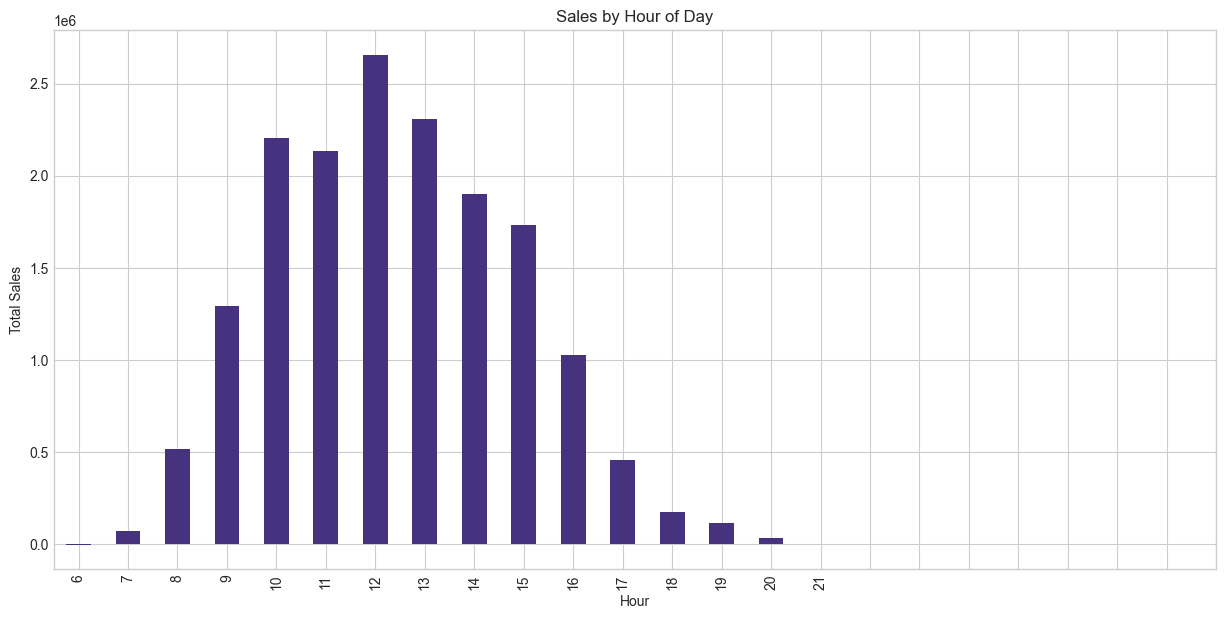

In [20]:
# Add columns for analysis
retail_df['YearMonth'] = retail_df['InvoiceDate'].dt.to_period('M')
retail_df['Year'] = retail_df['InvoiceDate'].dt.year
retail_df['Month'] = retail_df['InvoiceDate'].dt.month
retail_df['Day'] = retail_df['InvoiceDate'].dt.day
retail_df['DayOfWeek'] = retail_df['InvoiceDate'].dt.dayofweek
retail_df['DayName'] = retail_df['InvoiceDate'].dt.day_name()
retail_df['Hour'] = retail_df['InvoiceDate'].dt.hour

# Calculate sales value
retail_df['Sales'] = retail_df['Quantity'] * retail_df['Price']

# Monthly sales trend
monthly_sales = retail_df.groupby('YearMonth')['Sales'].sum()
plt.figure(figsize=(15, 7))
monthly_sales.plot(kind='bar', ax=plt.gca())
plt.title('Monthly Sales')
plt.ylabel('Total Sales')
plt.xlabel('Year-Month')
plt.xticks(rotation=45)
plt.show()

# Daily patterns
daily_sales = retail_df.groupby('DayName')['Sales'].sum()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = daily_sales.reindex(index=day_order)

plt.figure(figsize=(12, 6))
daily_sales.plot(kind='bar', ax=plt.gca())
plt.title('Sales by Day of Week')
plt.ylabel('Total Sales')
plt.xlabel('Day of Week')
plt.show()

# Hourly patterns
hourly_sales = retail_df.groupby('Hour')['Sales'].sum()
plt.figure(figsize=(15, 7))
hourly_sales.plot(kind='bar', ax=plt.gca())
plt.title('Sales by Hour of Day')
plt.ylabel('Total Sales')
plt.xlabel('Hour')
plt.xticks(range(0, 24))
plt.show()


#### 2.2.2 Customer Analysis

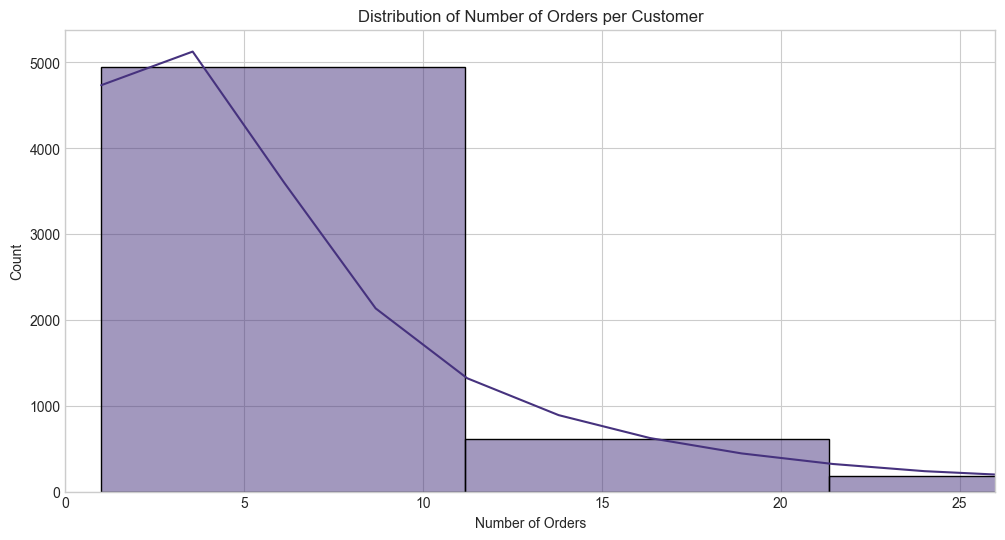

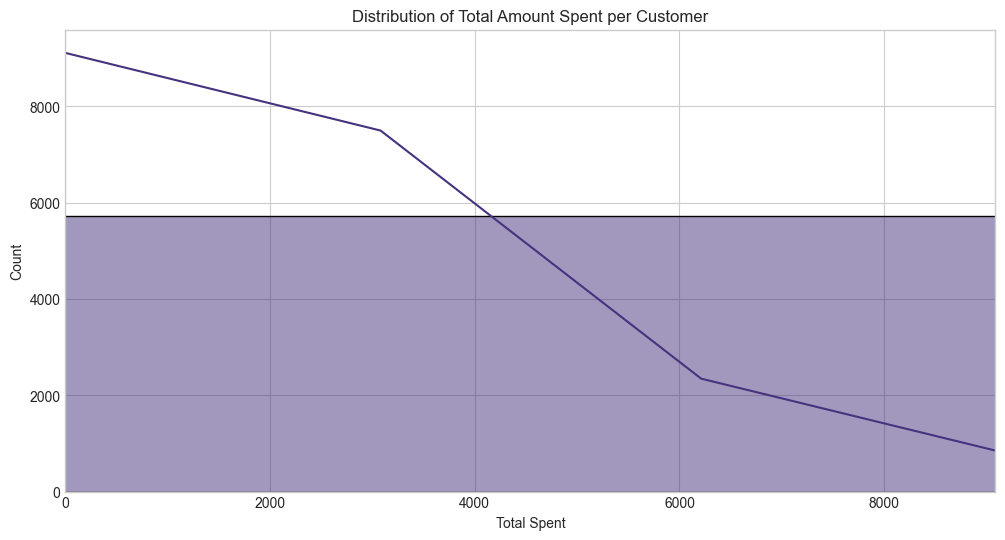

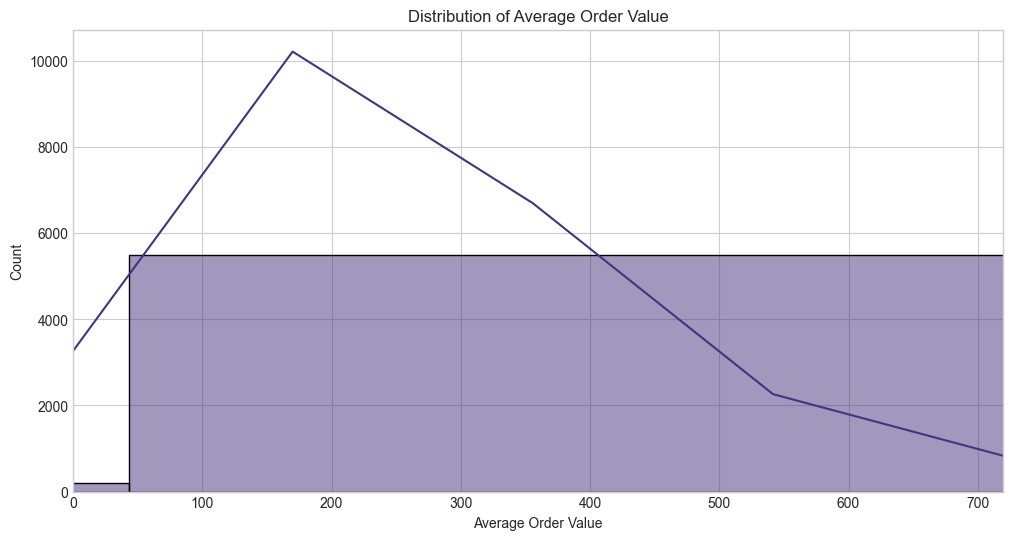

In [21]:
# Calculate key metrics per customer
customer_stats = retail_df.groupby('Customer ID').agg({
    'Invoice': 'nunique',
    'Sales': 'sum',
    'InvoiceDate': ['min', 'max']
}).reset_index()

customer_stats.columns = ['Customer ID', 'NumInvoices', 'TotalSpent', 'FirstPurchase', 'LastPurchase']

# Calculate days active and average order value
customer_stats['DaysActive'] = (customer_stats['LastPurchase'] - customer_stats['FirstPurchase']).dt.days
customer_stats['AvgOrderValue'] = customer_stats['TotalSpent'] / customer_stats['NumInvoices']

# Plot distribution of number of orders
plt.figure(figsize=(12, 6))
sns.histplot(customer_stats['NumInvoices'], bins=50, kde=True)
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Count')
plt.xlim(0, customer_stats['NumInvoices'].quantile(0.95))  # Limit x-axis to 95th percentile
plt.show()

# Plot distribution of total spent
plt.figure(figsize=(12, 6))
sns.histplot(customer_stats['TotalSpent'], bins=50, kde=True)
plt.title('Distribution of Total Amount Spent per Customer')
plt.xlabel('Total Spent')
plt.ylabel('Count')
plt.xlim(0, customer_stats['TotalSpent'].quantile(0.95))  # Limit x-axis to 95th percentile
plt.show()

# Plot distribution of average order value
plt.figure(figsize=(12, 6))
sns.histplot(customer_stats['AvgOrderValue'], bins=50, kde=True)
plt.title('Distribution of Average Order Value')
plt.xlabel('Average Order Value')
plt.ylabel('Count')
plt.xlim(0, customer_stats['AvgOrderValue'].quantile(0.95))  # Limit x-axis to 95th percentile
plt.show()


#### 2.2.3 Product Analysis

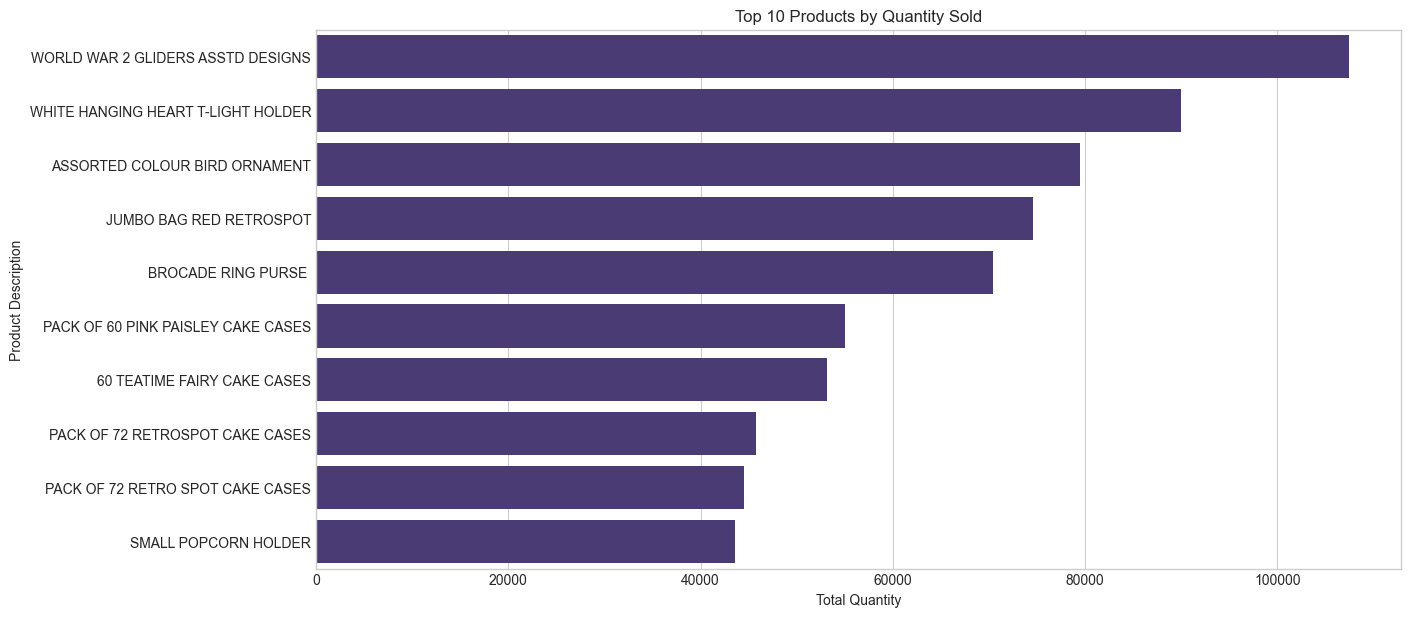

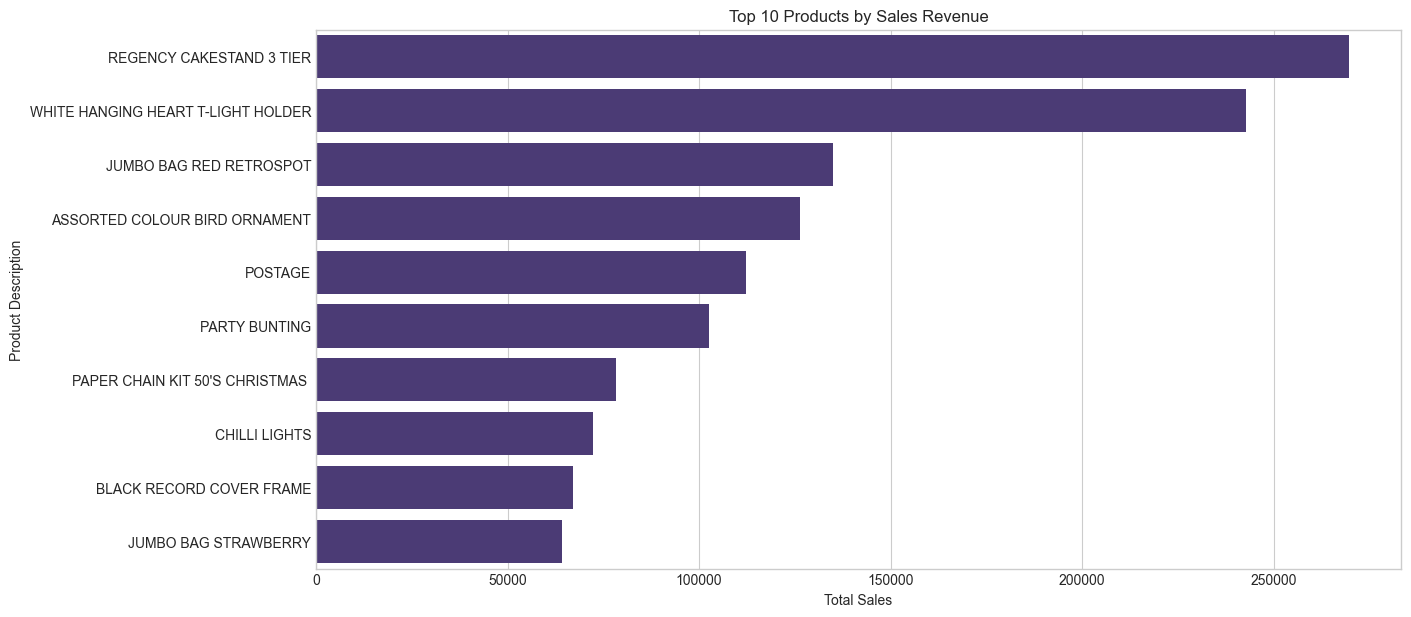

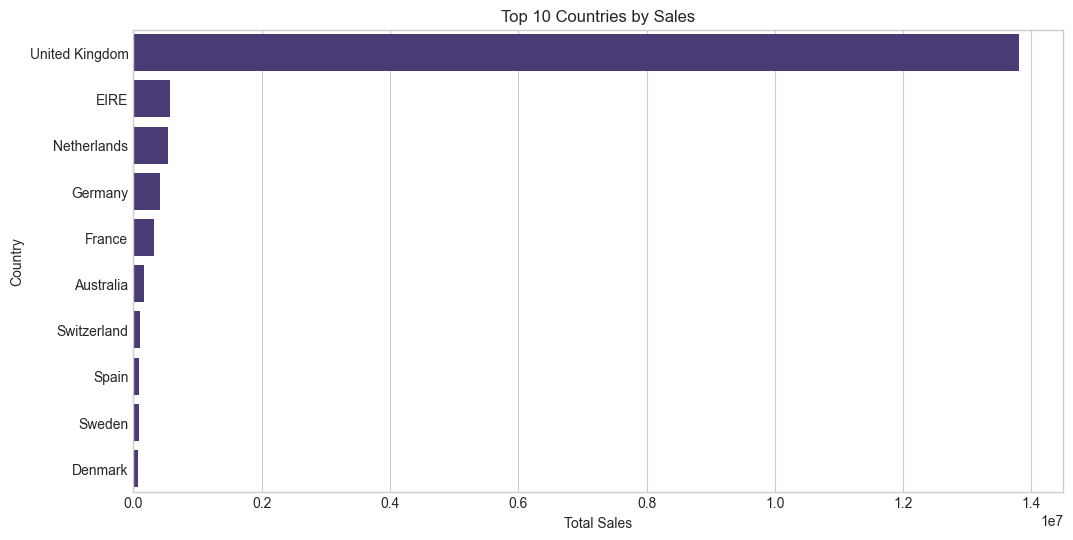

In [22]:
# Top products by quantity sold
top_products_qty = retail_df.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False).head(10)
top_products_qty = top_products_qty.reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='Quantity', y='Description', data=top_products_qty)
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Total Quantity')
plt.ylabel('Product Description')
plt.show()

# Top products by revenue
top_products_sales = retail_df.groupby(['StockCode', 'Description'])['Sales'].sum().sort_values(ascending=False).head(10)
top_products_sales = top_products_sales.reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='Sales', y='Description', data=top_products_sales)
plt.title('Top 10 Products by Sales Revenue')
plt.xlabel('Total Sales')
plt.ylabel('Product Description')
plt.show()

# Top countries by sales
top_countries = retail_df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()


### 2.3 Customer Personality Analysis

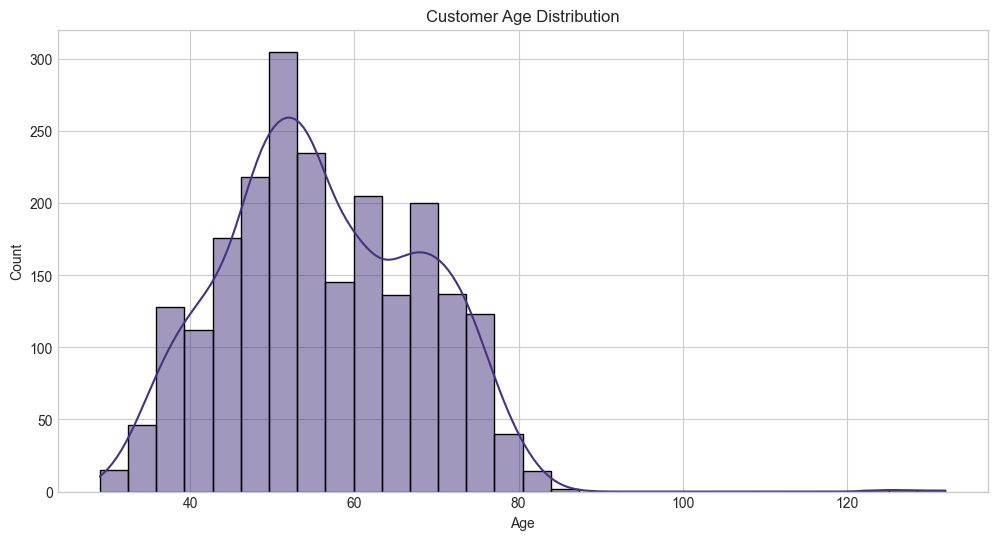

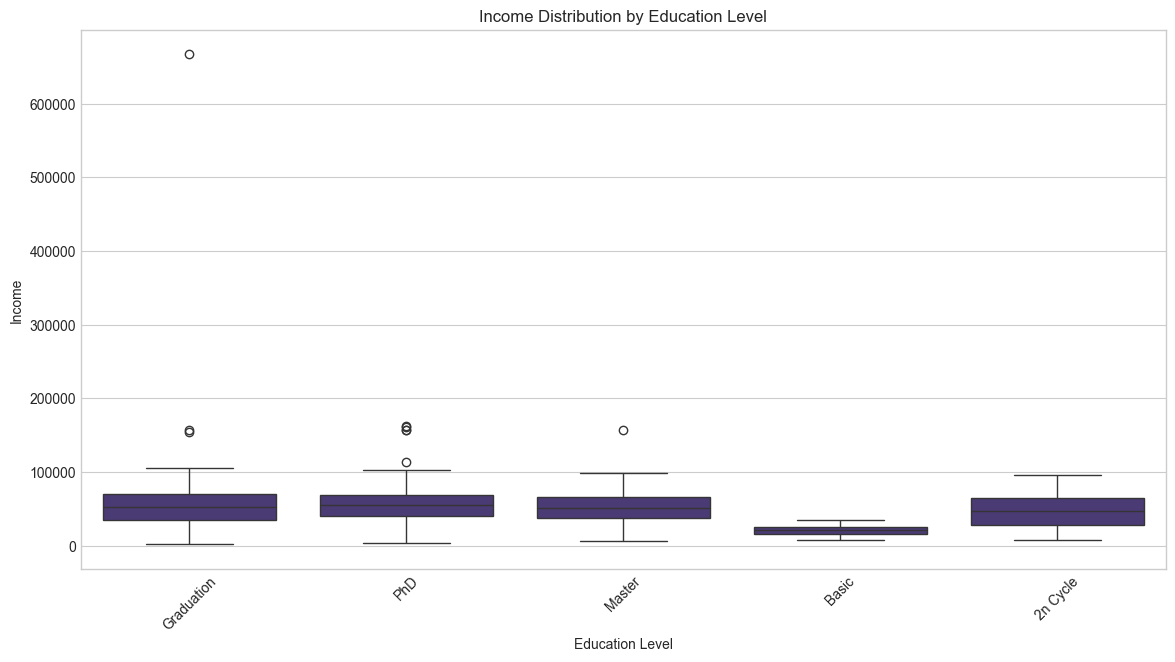

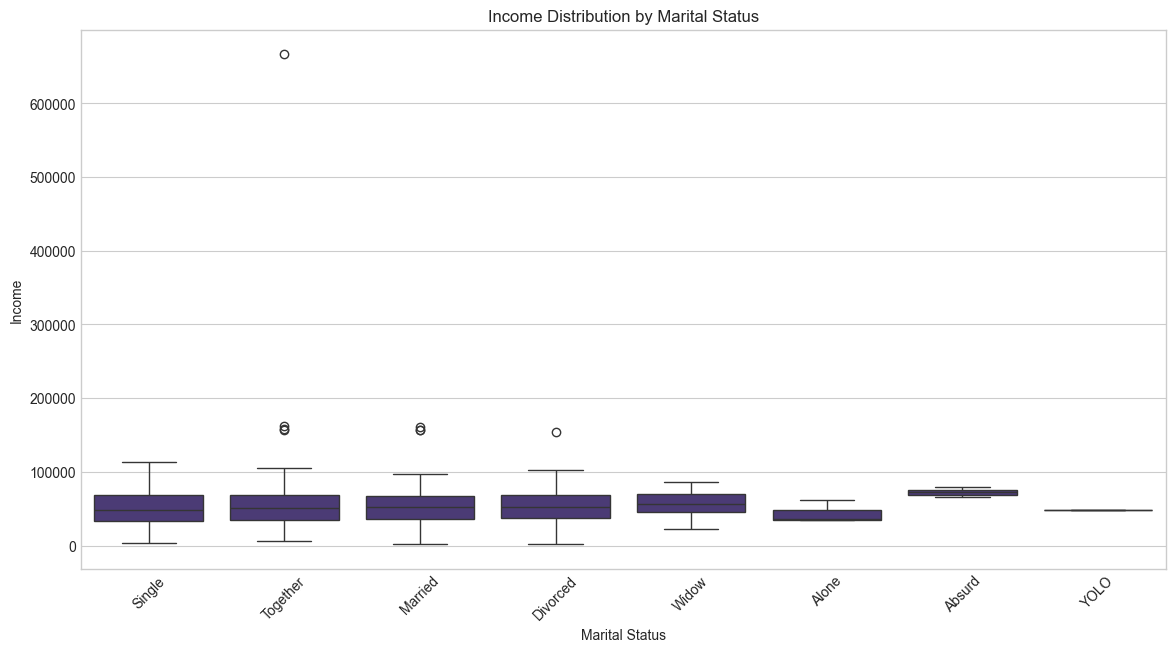

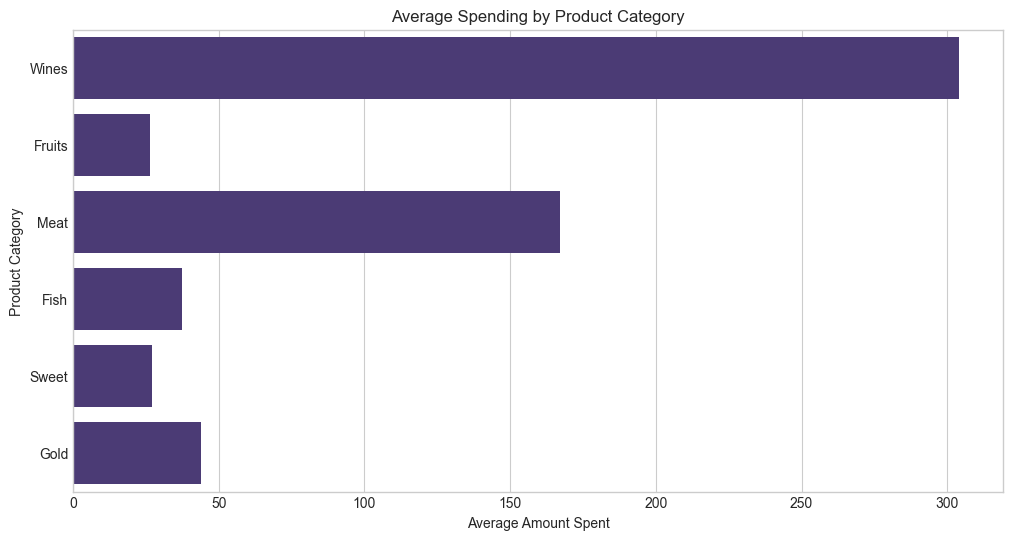

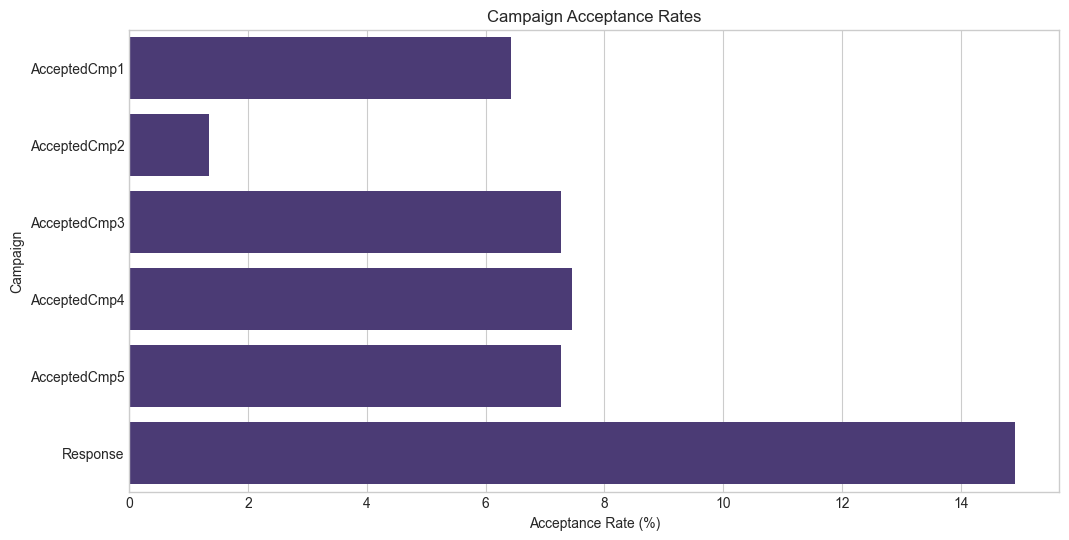

In [26]:
# Exploratory visualizations of customer demographics

# Age distribution
plt.figure(figsize=(12, 6))
sns.histplot(2025 - personality_df['Year_Birth'], bins=30, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Education level vs. Income
plt.figure(figsize=(14, 7))
sns.boxplot(x='Education', y='Income', data=personality_df)
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()

# Marital Status vs. Income
plt.figure(figsize=(14, 7))
sns.boxplot(x='Marital_Status', y='Income', data=personality_df)
plt.title('Income Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()

# Spending patterns by product category
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
spending_data = personality_df[spending_cols].mean().reset_index()
spending_data.columns = ['Category', 'AverageSpending']
spending_data['Category'] = spending_data['Category'].str.replace('Mnt', '').str.replace('Products', '').str.replace('Prods', '')

plt.figure(figsize=(12, 6))
sns.barplot(x='AverageSpending', y='Category', data=spending_data)
plt.title('Average Spending by Product Category')
plt.xlabel('Average Amount Spent')
plt.ylabel('Product Category')
plt.show()

# Campaign success rate
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
campaign_success = personality_df[campaign_cols].mean().reset_index()
campaign_success.columns = ['Campaign', 'AcceptanceRate']
campaign_success['AcceptanceRate'] = campaign_success['AcceptanceRate'] * 100

plt.figure(figsize=(12, 6))
sns.barplot(x='AcceptanceRate', y='Campaign', data=campaign_success)
plt.title('Campaign Acceptance Rates')
plt.xlabel('Acceptance Rate (%)')
plt.ylabel('Campaign')
plt.show()

## 3. Initial Business Insights
Based on our exploratory analysis, here are the key business insights:

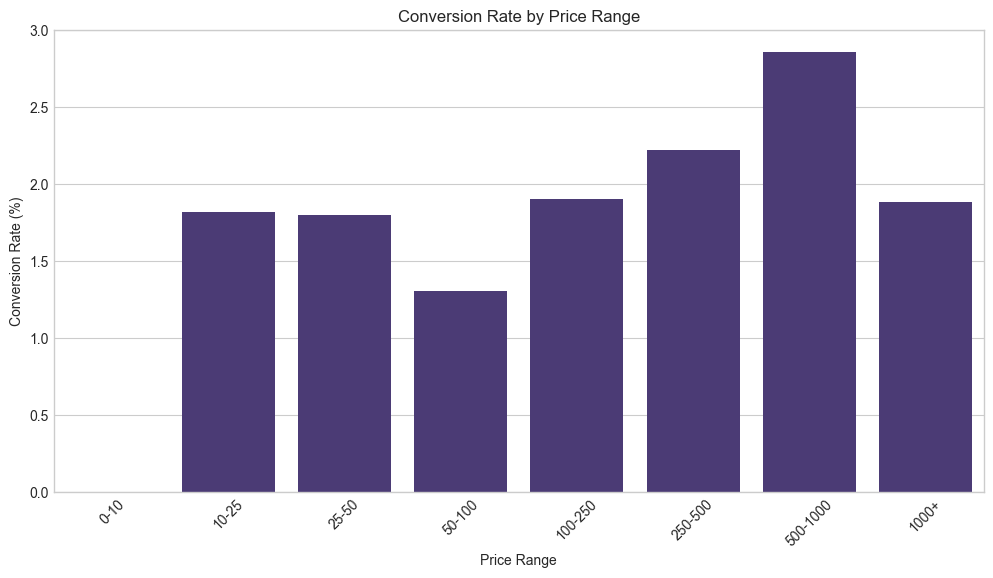

Key Business Insights:

1. Conversion Rates:
   - Overall view to purchase conversion rate: 1.99%
   - Cart abandonment rate: 32.14%

2. Customer Behavior:

3. Product Insights:
   - Most popular category: electronics.smartphone
   - Category with highest conversion rate: electronics.audio.acoustic (33.33%)

4. Temporal Patterns:
   - Peak purchasing hour: 8:00
   - Peak purchasing day: Friday

5. Business Challenges to Address:
   - High cart abandonment rate indicates potential checkout issues or price sensitivity
   - Price sensitivity analysis shows conversion drop-offs at specific price points
   - Long intervals between repeat purchases suggests need for improved retention strategies


In [30]:
# Product price sensitivity
# Calculate purchase rate at different price points

# Define price buckets
ecom_df['price_bucket'] = pd.cut(
    ecom_df['price'], 
    bins=[0, 10, 25, 50, 100, 250, 500, 1000, float('inf')],
    labels=['0-10', '10-25', '25-50', '50-100', '100-250', '250-500', '500-1000', '1000+']
)

# Calculate conversion rate by price bucket
price_conversion = ecom_df.groupby('price_bucket').apply(
    lambda x: (x['event_type'] == 'purchase').sum() / len(x) * 100
).reset_index(name='conversion_rate')

plt.figure(figsize=(12, 6))
sns.barplot(x='price_bucket', y='conversion_rate', data=price_conversion)
plt.title('Conversion Rate by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Summarize key insights
print("Key Business Insights:")
print("\n1. Conversion Rates:")
print(f"   - Overall view to purchase conversion rate: {view_to_purchase_rate:.2f}%")
print(f"   - Cart abandonment rate: {100 - cart_to_purchase_rate:.2f}%")

print("\n2. Customer Behavior:")
if 'repeat_customers' in locals() and len(repeat_customers) > 0:
    avg_time_between_purchases = np.mean(time_diffs)
    print(f"   - {len(repeat_customers) / len(user_purchases) * 100:.2f}% of customers make repeat purchases")
    print(f"   - Average time between purchases: {avg_time_between_purchases:.2f} days")

print("\n3. Product Insights:")
if 'top_categories' in locals():
    print(f"   - Most popular category: {top_categories.index[0]}")
if 'category_conversion' in locals():
    print(f"   - Category with highest conversion rate: {category_conversion.index[0]} ({category_conversion.values[0]:.2f}%)")

print("\n4. Temporal Patterns:")
if 'hourly_events' in locals() and 'purchase' in hourly_events.columns:
    peak_hour = hourly_events['purchase'].idxmax()
    print(f"   - Peak purchasing hour: {peak_hour}:00")
if 'dow_events' in locals() and 'purchase' in dow_events.columns:
    peak_day = dow_events['purchase'].idxmax()
    print(f"   - Peak purchasing day: {peak_day}")

print("\n5. Business Challenges to Address:")
print("   - High cart abandonment rate indicates potential checkout issues or price sensitivity")
print("   - Price sensitivity analysis shows conversion drop-offs at specific price points")
print("   - Long intervals between repeat purchases suggests need for improved retention strategies")


## 7. Next Steps

Based on our initial analysis, the following steps are recommended:

1. **Data Preprocessing and Feature Engineering**
   - Handle missing values in category_code and brand columns
   - Create time-based features for user behavior
   - Develop RFM metrics for customer segmentation

2. **Customer Segmentation**
   - Segment customers based on browsing and purchasing behavior
   - Identify high-value customer groups
   - Analyze characteristics of customers at risk of churning

3. **Recommendation System Development**
   - Build collaborative filtering models based on user-item interactions
   - Develop content-based recommendations using product attributes
   - Create hybrid approaches for best performance

4. **Predictive Modeling**
   - Develop churn prediction models
   - Build customer lifetime value prediction
   - Create models for next purchase prediction
